<a href="https://colab.research.google.com/github/AkkiAT/AT/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read in Data and NLTK Basics**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [4]:
df = pd.read_csv('/content/Covid-19 Twitter Dataset (Apr-Jun 2020).csv.zip')
df.head()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @GlblCtzn: .@priyankachopra is calling on l...,en,0.0,31.0,RJIshak,NaN,"GlblCtzn, priyankachopra",Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.0,0.452,0.548,pos
1,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,en,0.0,61.0,makinwaoluwole,NaN,OGSG_Official,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.0,0.602,0.398,pos
2,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @AdvoBarryRoux: These 5 police officials ba...,en,0.0,1.0,TembeAmu,NaN,AdvoBarryRoux,NaN,polic offici base namahadi polic station busi ...,0.2732,0.0,0.851,0.149,pos
3,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @MobilePunch: COVID-19: Oyo discharges two ...,en,0.0,0.0,ilyasrabiu,NaN,MobilePunch,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0000,0.0,1.000,0.000,neu
4,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",My Condolences to the Family of those who did ...,en,0.0,13869.0,bucketeconomist,Covid_19,NaN,NaN,condol famili surviv,0.0000,0.0,1.000,0.000,neu


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143903 entries, 0 to 143902
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               143901 non-null  float64
 1   created_at       143902 non-null  object 
 2   source           143876 non-null  object 
 3   original_text    143902 non-null  object 
 4   lang             143902 non-null  object 
 5   favorite_count   143902 non-null  float64
 6   retweet_count    143902 non-null  float64
 7   original_author  143902 non-null  object 
 8   hashtags         28510 non-null   object 
 9   user_mentions    107332 non-null  object 
 10  place            105021 non-null  object 
 11  clean_tweet      143419 non-null  object 
 12  compound         143903 non-null  float64
 13  neg              143903 non-null  float64
 14  neu              143903 non-null  float64
 15  pos              143903 non-null  float64
 16  sentiment        143903 non-null  obje

In [6]:
df.shape

(143903, 17)

In [7]:
df.describe()

,id,favorite_count,retweet_count,compound,neg,neu,pos
count,1.439010e+05,143902.000000,143902.000000,143903.000000,143903.000000,143903.000000,143903.000000
mean,1.260088e+18,0.191151,1925.238273,0.004537,0.097123,0.797310,0.105569
std,5.401576e+15,4.713526,10168.291564,0.382305,0.157005,0.201068,0.155915
min,1.250000e+18,0.000000,0.000000,-0.990100,0.000000,0.000000,0.000000
25%,1.260000e+18,0.000000,1.000000,-0.177900,0.000000,0.652000,0.000000
50%,1.260000e+18,0.000000,17.000000,0.000000,0.000000,0.804000,0.000000
75%,1.260000e+18,0.000000,296.000000,0.273200,0.193000,1.000000,0.206000
max,1.270000e+18,1166.000000,399220.000000,0.961200,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

id                      2
created_at              1
source                 27
original_text           1
lang                    1
favorite_count          1
retweet_count           1
original_author         1
hashtags           115393
user_mentions       36571
place               38882
clean_tweet           484
compound                0
neg                     0
neu                     0
pos                     0
sentiment               0
dtype: int64

In [17]:
df.columns

Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')

In [18]:
df.created_at.value_counts()

created_at
2020-05-04    7165
2020-04-25    6178
2020-05-09    5857
2020-05-23    5600
2020-04-24    5323
2020-05-22    5103
2020-05-05    4949
2020-05-25    4804
2020-05-06    4575
2020-05-03    4570
2020-05-07    4553
2020-05-01    4445
2020-04-26    4435
2020-05-24    4315
2020-05-16    4044
2020-05-11    4032
2020-05-12    3994
2020-05-08    3984
2020-04-29    3847
2020-04-28    3837
2020-05-10    3594
2020-05-14    3356
2020-04-30    3234
2020-04-27    3028
2020-05-13    2595
2020-05-02    2178
2020-05-15    2035
2020-05-18    1828
2020-05-20    1445
2020-06-12    1304
2020-05-17    1256
2020-05-30    1242
2020-06-01    1201
2020-06-11    1165
2020-06-06    1144
2020-06-09    1122
2020-06-05    1065
2020-05-28    1047
2020-06-17    1026
2020-06-13    1003
2020-06-10     991
2020-05-27     965
2020-06-07     922
2020-06-15     899
2020-04-22     896
2020-05-26     861
2020-06-19     850
2020-05-31     819
2020-06-04     812
2020-06-14     812
2020-06-03     807
2020-06-20     721
2

In [20]:
df['place'].value_counts()

place
United States               1777
India                       1149
Nigeria                     1053
London                      1031
Lagos, Nigeria               998
                            ... 
Anywhere, we are virtual       1
Cheney, WA                     1
okay i love you bye bye        1
Svätý Jur, Slovakia            1
AT THE MOVIES                  1
Name: count, Length: 35495, dtype: int64

In [21]:
df['sentiment'].value_counts()

sentiment
neu    57586
pos    46125
neg    40192
Name: count, dtype: int64

In [22]:
df[df['sentiment']=='pos']

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @GlblCtzn: .@priyankachopra is calling on l...,en,0.0,31.0,RJIshak,NaN,"GlblCtzn, priyankachopra",Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.000,0.452,0.548,pos
1,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,en,0.0,61.0,makinwaoluwole,NaN,OGSG_Official,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.000,0.602,0.398,pos
2,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @AdvoBarryRoux: These 5 police officials ba...,en,0.0,1.0,TembeAmu,NaN,AdvoBarryRoux,NaN,polic offici base namahadi polic station busi ...,0.2732,0.000,0.851,0.149,pos
11,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @BuckSexton: Doctor friend who is deliverin...,en,0.0,19.0,winniekiiza1,NaN,BuckSexton,"Kampala, Uganda",doctor friend deliv babi crisi told interest d...,0.7351,0.000,0.617,0.383,pos
13,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @ClevelandClinic: Prevention is key. Know t...,en,0.0,0.0,IDevilNeck,COVID19,ClevelandClinic,North Coast,prevent key know simpl step take today protect,0.4019,0.000,0.619,0.381,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143891,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/iphone"" r...",RT @WomenFilmOfColr: Taraji P. Henson’s Founda...,en,0.0,6609.0,tsnmi_xoo,NaN,WomenFilmOfColr,"Suitland, MD",taraji henson foundat provid free therapi blac...,0.5106,0.000,0.708,0.292,pos
143892,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/android"" ...",RT @Rondell_Trevino: To be clear: Affirming th...,en,0.0,9207.0,MisteeSBrowning,NaN,Rondell_Trevino,NaN,clear affirm black brown life matter also wear...,0.4019,0.000,0.730,0.270,pos
143894,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/android"" ...",RT @DDMADelhi1: DDMA invites volunteers/NGOs t...,en,0.0,7467.0,AlediaSunil,NaN,DDMADelhi1,New Delhi,ddma invit volunt ngo boost fight covid19,0.0258,0.252,0.485,0.262,pos
143901,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/android"" ...",RT @HonorDecency: We knew Covid-19 would be sp...,en,0.0,1.0,cinemaofdreams,NaN,HonorDecency,AT THE MOVIES,knew covid19 would spread trump prais els rall...,0.5994,0.000,0.755,0.245,pos


In [23]:
filtered_df = df[df['sentiment']=='pos'].reset_index(drop=True)
print(filtered_df.loc[20, 'clean_tweet'])

need find person surviv corona viru fulli recov donat save uncl life pleas pleas


In [24]:
df[df['sentiment']=='neg']

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
6,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",Taiwan's Vice-President Chen Chien-jen on his ...,en,0.0,119.0,agostinhozinga,NaN,NaN,"London, England",taiwan vice presid chen chien jen countri figh...,-0.3818,0.245,0.755,0.0,neg
7,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @morethanmySLE: BREAKING: A New York woman ...,en,0.0,474.0,DrJeffreyPOlson,coronavirus,morethanmySLE,JPO Aesthetics,break new york woman symptom die last week pre...,-0.5994,0.262,0.738,0.0,neg
12,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @KatiePhang: “‘[COVID-19] can attack almost...,en,0.0,20173.0,annmartincwc,NaN,KatiePhang,NaN,covid19 attack almost anyth bodi devast conseq...,-0.4767,0.256,0.744,0.0,neg
15,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @JoeConchaTV: Wallace to Pelosi on her also...,en,0.0,408.0,freegalt,NaN,JoeConchaTV,NaN,wallac pelosi also downplay covid19 presid und...,-0.5267,0.236,0.764,0.0,neg
16,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @OIC_IPHRC: 1/2 #OIC-IPHRC condemns the unr...,en,0.0,227.0,kashif_afzalkpk,"OIC, Islamophobic, India, COVID",OIC_IPHRC,"Dubai, United Arab Emirates",iphrc condemn unrel viciou campaign malign mus...,-0.3818,0.271,0.729,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143885,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/iphone"" r...",Of course America is blindly insistent on bein...,en,0.0,0.0,JohnSurico,NaN,NaN,"Oxford, UK",cours america blindli insist worst countri wor...,-0.6249,0.339,0.661,0.0,neg
143886,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/iphone"" r...",His gross mismanagement of this crisis has rui...,en,0.0,4.0,franklinKAGq,NaN,NaN,"Washington, USA",gross mismanag crisi ruin life covid19 ever re...,-0.7845,0.463,0.537,0.0,neg
143888,1.270000e+18,2020-06-20,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@qureshik74 COVID-19 is a disease caused by a ...,en,0.0,38.0,sweetredrose103,NaN,qureshik74,"Punjab, Pakistan",covid19 diseas caus new strain coronaviru co s...,-0.0516,0.107,0.893,0.0,neg
143895,1.270000e+18,2020-06-20,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @dailynation: Shock as Jack Ma's Covid-19 d...,en,0.0,3528.0,vinadadkelvin,NaN,dailynation,Nairobi,shock jack covid19 donat stolen,-0.7003,0.659,0.341,0.0,neg


In [25]:
filtered_df = df[df['sentiment']=='neg'].reset_index(drop=True)
print(filtered_df.loc[20, 'clean_tweet'])

bet one singl arrest thousand isra brave covid19 heath risk protest


In [26]:
df[df['sentiment']=='neu']

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
3,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @MobilePunch: COVID-19: Oyo discharges two ...,en,0.0,0.0,ilyasrabiu,NaN,MobilePunch,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0,0.0,1.0,0.0,neu
4,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",My Condolences to the Family of those who did ...,en,0.0,13869.0,bucketeconomist,Covid_19,NaN,NaN,condol famili surviv,0.0,0.0,1.0,0.0,neu
5,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @DrJMZimmerman: I received this text from m...,en,0.0,526.0,rohaniroop,NaN,DrJMZimmerman,"British Columbia, Canada",receiv text year old son work covid19 patient ...,0.0,0.0,1.0,0.0,neu
8,1.250000e+18,2020-04-19,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Horrible tragedy in Nova Scotia today. How wil...,en,0.0,23.0,MichelleCarbert,NaN,NaN,"Ottawa, Ontario",horribl tragedi nova scotia today famili get c...,0.0,0.0,1.0,0.0,neu
9,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",@TahirsyeedK @sagarikaghose Covid-19 can be cu...,en,0.0,6.0,Deshbha21624810,NaN,"TahirsyeedK, sagarikaghose",NaN,covid19 cure sooner later cure ghose viru,0.0,0.0,1.0,0.0,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143893,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @ABC17News: Missouri has seen large increas...,en,0.0,659.0,rattygirl41,NaN,ABC17News,NaN,missouri seen larg increas case covid19 last s...,0.0,0.0,1.0,0.0,neu
143896,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/android"" ...",RT @AliRazaAhsanBa1: Aoa to everyone. .I need ...,en,0.0,0.0,RaoNaan,NaN,AliRazaAhsanBa1,"Islamabad, Pakistan",aoa everyon need plasma father recov patient c...,0.0,0.0,1.0,0.0,neu
143897,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/android"" ...",There is Covid-19 and there is Glock 19! A sem...,en,0.0,147599.0,epiphanydre,NaN,NaN,Epiphany World,covid19 glock semiautomat pistol manufactur au...,0.0,0.0,1.0,0.0,neu
143898,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/android"" ...",RT @StuartBrownFCO: Congratulations to all tho...,en,0.0,207.0,abdalesaid,"Somaliland, ChosenForChevening",StuartBrownFCO,"burao, somaliland",congratul studi one year master degre,0.0,0.0,1.0,0.0,neu


In [27]:
filtered_df = df[df['sentiment']=='neu'].reset_index(drop=True)
print(filtered_df.loc[20, 'clean_tweet'])

covid19 edo impos curfew


In [28]:
pd.isnull(df["sentiment"])

0         False
1         False
2         False
3         False
4         False
          ...  
143898    False
143899    False
143900    False
143901    False
143902    False
Name: sentiment, Length: 143903, dtype: bool

In [29]:
null_count = df.isnull().sum()
print(null_count)

id                      2
created_at              1
source                 27
original_text           1
lang                    1
favorite_count          1
retweet_count           1
original_author         1
hashtags           115393
user_mentions       36571
place               38882
clean_tweet           484
compound                0
neg                     0
neu                     0
pos                     0
sentiment               0
dtype: int64


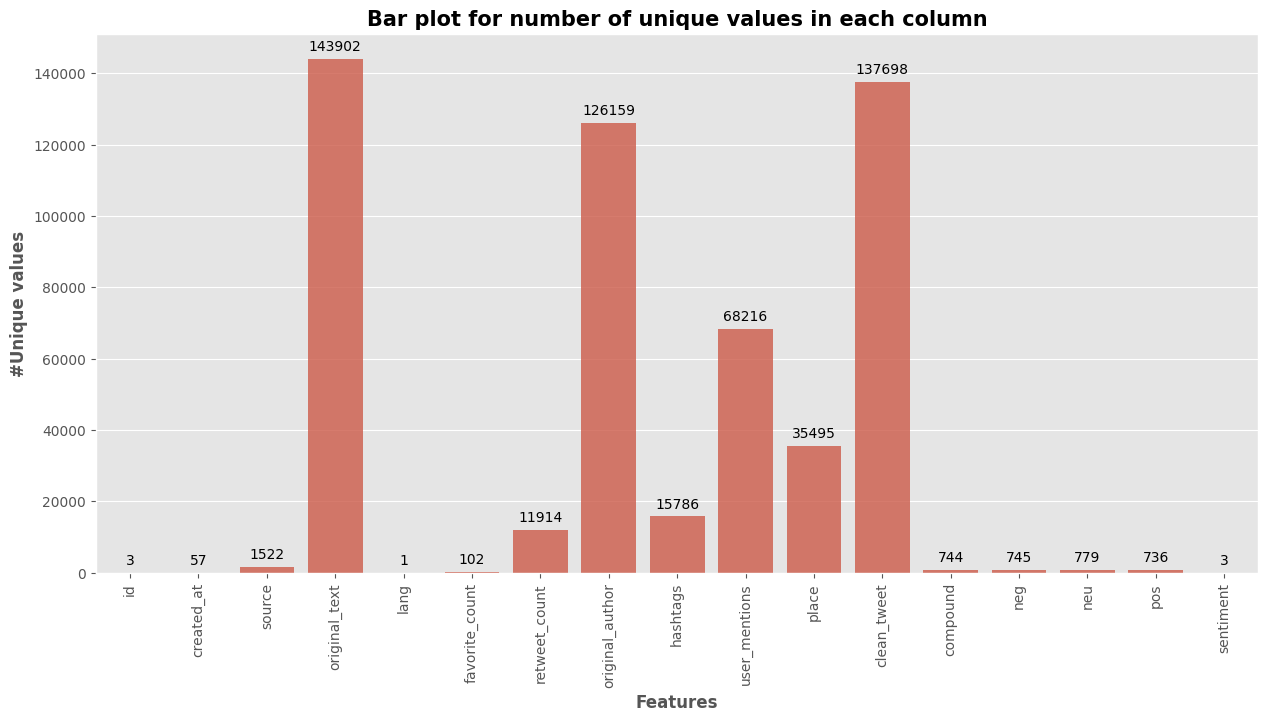

In [30]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [31]:
loc_analysis = pd.DataFrame(df['place'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'place':'count'})

In [32]:
import plotly.graph_objects as go

In [33]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

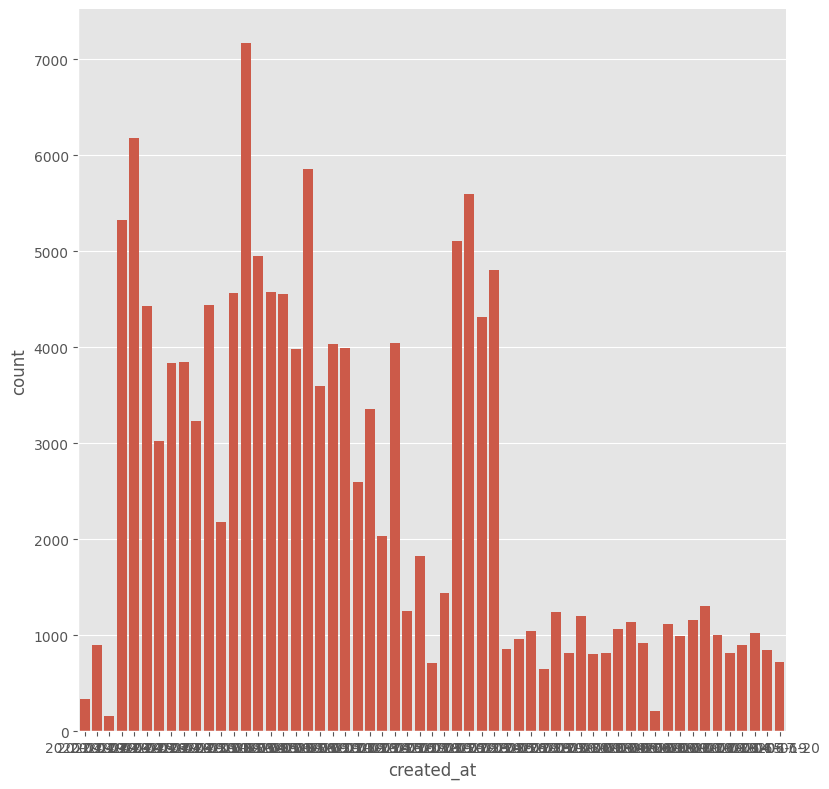

In [34]:
sns.catplot(x="created_at", data=df, kind="count", height=8)

In [35]:
Top_Location_Of_tweet= df['place'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [36]:
Top_Location_Of_tweet.head(10)

place
United States      1777
India              1149
Nigeria            1053
London             1031
Lagos, Nigeria      998
London, England     933
Washington, DC      815
United Kingdom      711
USA                 703
New York, NY        637
Name: count, dtype: int64

In [37]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,place,count
0,United States,1777
1,India,1149
2,Nigeria,1053
3,London,1031
4,"Lagos, Nigeria",998
5,"London, England",933
6,"Washington, DC",815
7,United Kingdom,711
8,USA,703
9,"New York, NY",637


<ipython-input-38-7467c0213d64>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-38-7467c0213d64>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'United States'),
 Text(1, 0, 'India'),
 Text(2, 0, 'Nigeria'),
 Text(3, 0, 'London'),
 Text(4, 0, 'Lagos, Nigeria'),
 Text(5, 0, 'London, England'),
 Text(6, 0, 'Washington, DC'),
 Text(7, 0, 'United Kingdom'),
 Text(8, 0, 'USA'),
 Text(9, 0, 'New York, NY')]

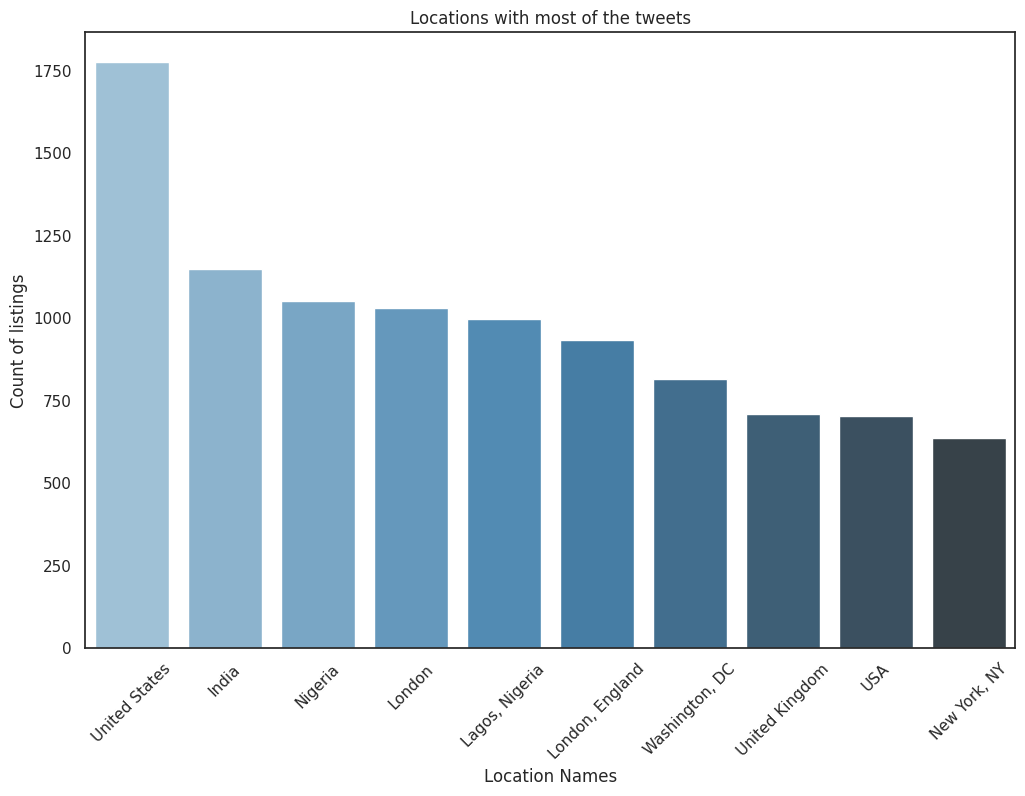

In [38]:
viz_1=sns.barplot(x="place", y="count", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

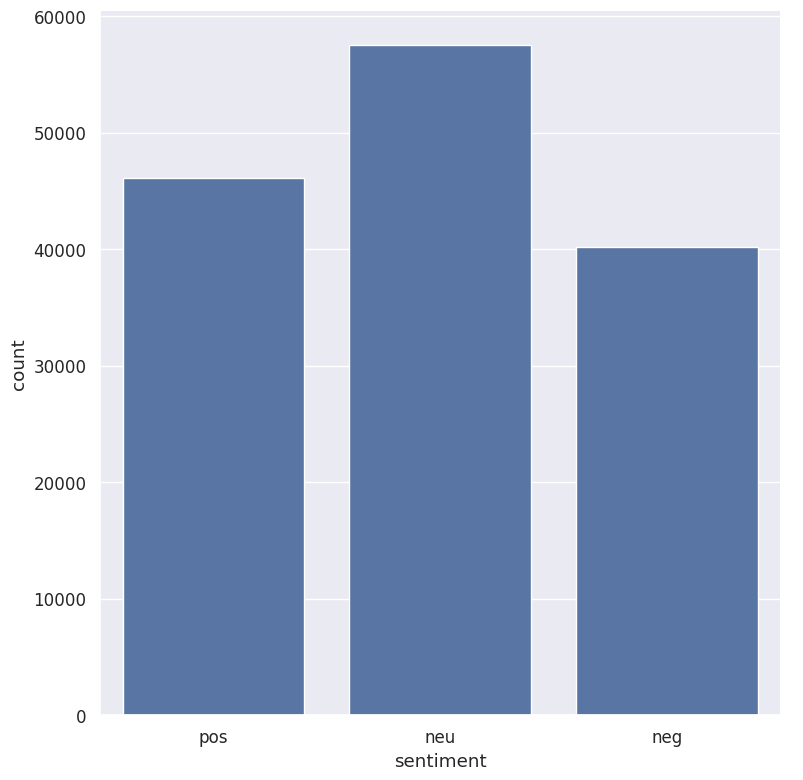

In [39]:
sns.set(font_scale=1.1)
sns.catplot(x="sentiment", data=df, kind="count", height=8)

In [40]:
df.created_at.value_counts()

created_at
2020-05-04    7165
2020-04-25    6178
2020-05-09    5857
2020-05-23    5600
2020-04-24    5323
2020-05-22    5103
2020-05-05    4949
2020-05-25    4804
2020-05-06    4575
2020-05-03    4570
2020-05-07    4553
2020-05-01    4445
2020-04-26    4435
2020-05-24    4315
2020-05-16    4044
2020-05-11    4032
2020-05-12    3994
2020-05-08    3984
2020-04-29    3847
2020-04-28    3837
2020-05-10    3594
2020-05-14    3356
2020-04-30    3234
2020-04-27    3028
2020-05-13    2595
2020-05-02    2178
2020-05-15    2035
2020-05-18    1828
2020-05-20    1445
2020-06-12    1304
2020-05-17    1256
2020-05-30    1242
2020-06-01    1201
2020-06-11    1165
2020-06-06    1144
2020-06-09    1122
2020-06-05    1065
2020-05-28    1047
2020-06-17    1026
2020-06-13    1003
2020-06-10     991
2020-05-27     965
2020-06-07     922
2020-06-15     899
2020-04-22     896
2020-05-26     861
2020-06-19     850
2020-05-31     819
2020-06-04     812
2020-06-14     812
2020-06-03     807
2020-06-20     721
2

In [41]:
df.head(2)

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @GlblCtzn: .@priyankachopra is calling on l...,en,0.0,31.0,RJIshak,NaN,"GlblCtzn, priyankachopra",Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.0,0.452,0.548,pos
1,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,en,0.0,61.0,makinwaoluwole,NaN,OGSG_Official,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.0,0.602,0.398,pos


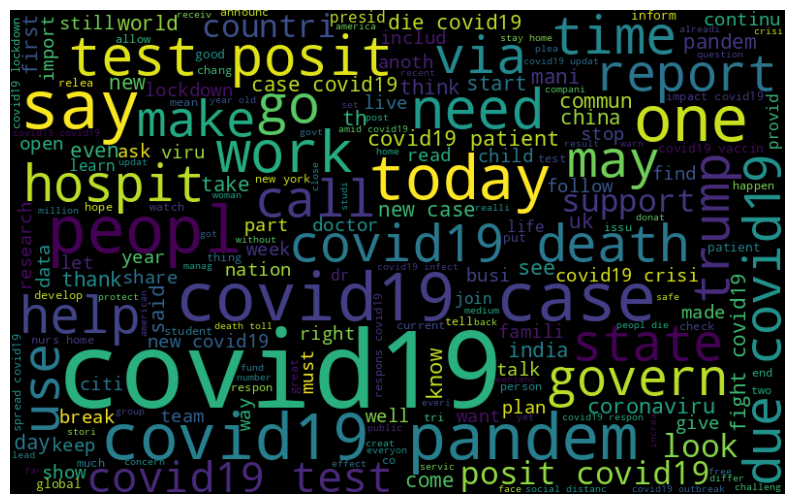

In [42]:
all_words = ' '.join([str(text) for text in df['clean_tweet'] if pd.notnull(text)])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

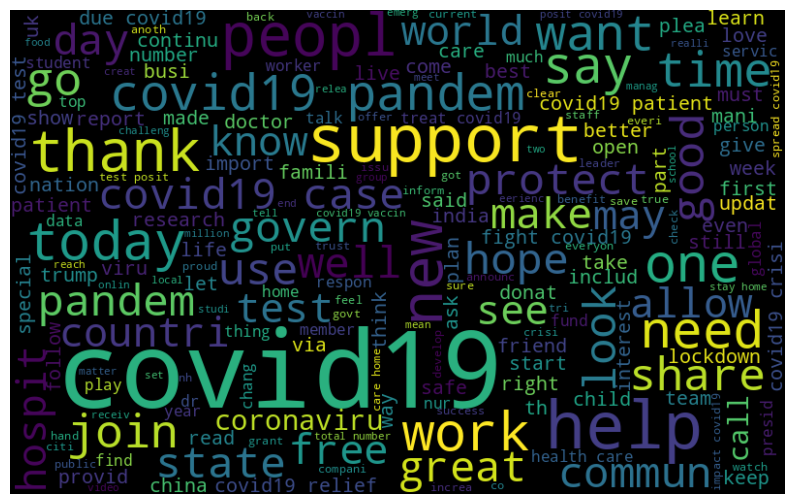

In [43]:
normal_words = ' '.join([text for text in df['clean_tweet'][df['sentiment'] == 'pos']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
# function to collect hashtags
import re

# Function to extract hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        if isinstance(i, str):  # Check if the value is a string
            ht = re.findall(r'#(\w+)', i)
            hashtags.extend(ht)
    return hashtags

In [45]:
# extracting hashtags from non racist/sexist tweets
HT_Positive = hashtag_extract(df['original_text'][df['sentiment'] == 'pos'])
HT_Neutral = hashtag_extract(df['original_text'][df['sentiment'] == 'neu'])
HT_Negative = hashtag_extract(df['original_text'][df['sentiment'] == 'neg'])




# unnesting list

HT_Positive = [item for sublist in HT_Positive for item in sublist]
HT_Neutral = [item for sublist in HT_Neutral for item in sublist]
HT_Negative = [item for sublist in HT_Negative for item in sublist]

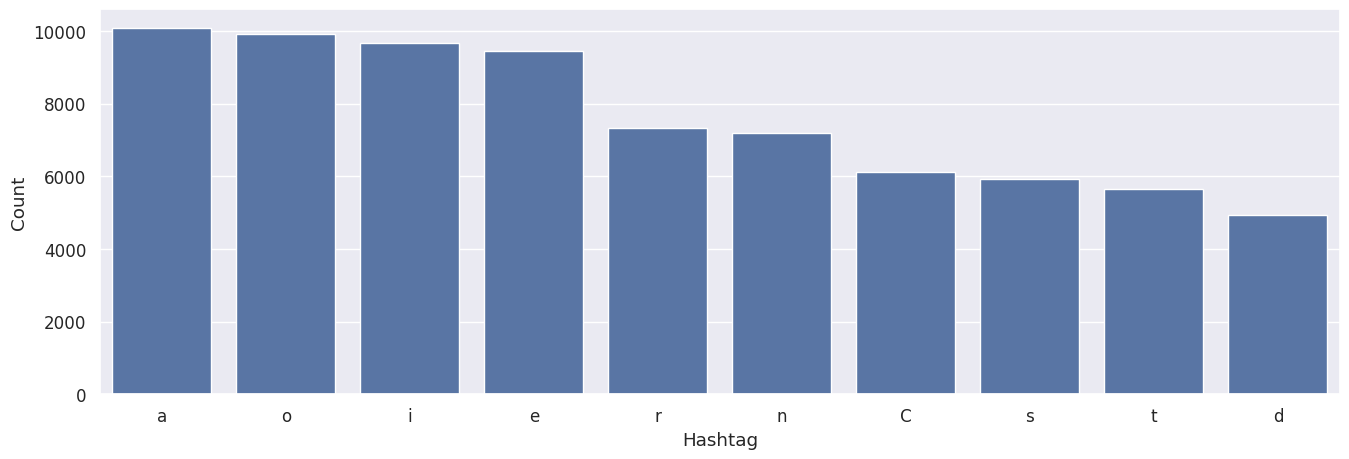

In [46]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

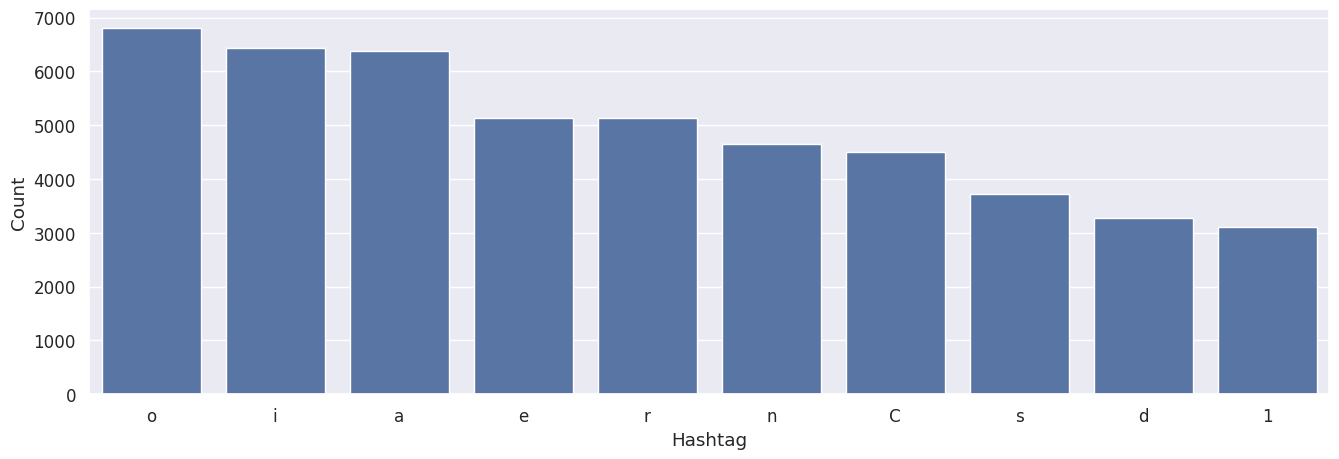

In [47]:
# making frequency distribution top 10 Negative hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

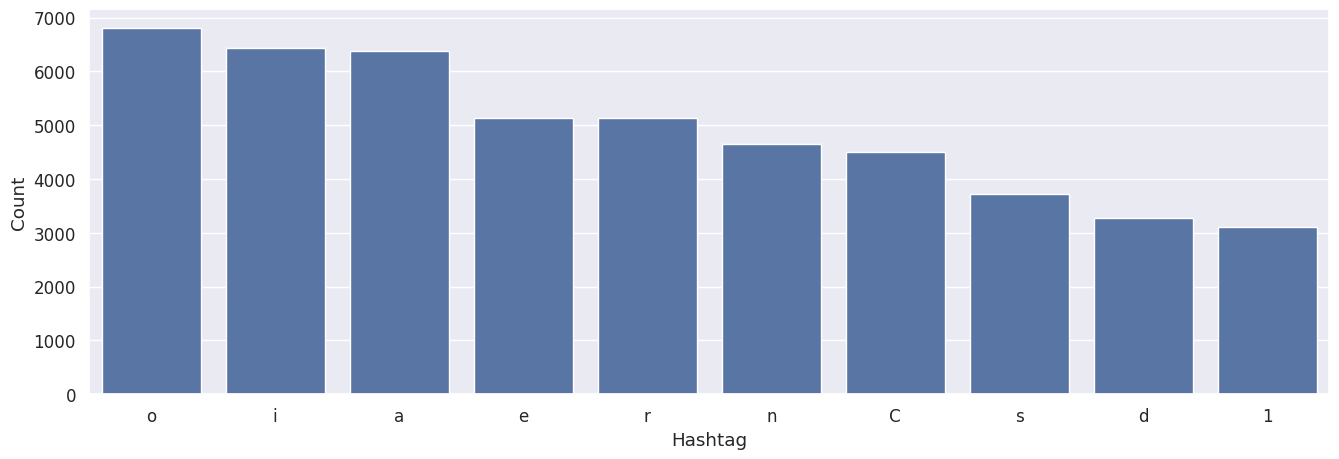

In [49]:
# making frequency distribution top 10 Neutral hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [50]:
new_df = df[['clean_tweet','sentiment']]

In [51]:
new_df.head()

,clean_tweet,sentiment
0,call leader help protect refuge covid19 provid...,pos
1,ogun state support cbn nirsal covid19 target c...,pos
2,polic offici base namahadi polic station busi ...,pos
3,covid19 oyo discharg two patient,neu
4,condol famili surviv,neu


In [52]:
df['sentiment'].value_counts()

sentiment
neu    57586
pos    46125
neg    40192
Name: count, dtype: int64

In [53]:
new_df.shape

(143903, 2)

In [54]:
new_df.isnull().sum()

clean_tweet    484
sentiment        0
dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (114735, 2)
valid shape :  (28684, 2)
